In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

In [32]:
my_cols = ["st. no.", "dates", "cloud_present"]
# vidd delhi 42182
# 42027 srinagar
# 43346 karaikal
# 43285 mangalore
df = pd.read_csv("../data/computed_tropopause_data/vidd_all_data.csv", names=my_cols)
# df = pd.read_csv("../data/computed_tropopause_data/42027_all_data.csv", names=my_cols)
# df = pd.read_csv("../data/computed_tropopause_data/43346_all_data.csv", names=my_cols)
# df = pd.read_csv("../data/computed_tropopause_data/43285_all_data.csv", names=my_cols)

In [33]:
df["cloud_present"].value_counts(1)['1']*100
# gives % of times 1/0 occured

99.708454810495624

In [24]:
filename = "AIRS.2002.08.31.nc4"
filename.split('.')

['AIRS', '2002', '08', '31', 'nc4']

In [34]:
date = "12Z 08 Mar 1974"
date.split(' ')[-1]

'1974'

In [11]:
str(int(df['st. no.'][0]))

'42182'

In [9]:
df["dates"].tolist()[0]
dates_list = [str(x) for x in df["dates"].tolist()]
print dates_list

['12Z 08 Mar 1974', '12Z 29 Mar 1974', '00Z 08 May 1974', '12Z 11 May 1974', '12Z 29 Nov 1974', '00Z 08 May 1975', '12Z 21 May 1975', '12Z 01 Oct 1975', '00Z 26 Oct 1975', '12Z 29 Nov 1975', '12Z 24 Jan 1976', '12Z 13 Mar 1976', '12Z 16 May 1976', '00Z 21 May 1976', '00Z 20 Jun 1976', '00Z 27 Nov 1976', '00Z 05 Dec 1976', '00Z 17 Dec 1976', '12Z 20 Feb 1977', '00Z 27 Mar 1977', '12Z 28 Mar 1977', '12Z 07 Apr 1977', '00Z 14 Apr 1977', '12Z 17 Apr 1977', '00Z 04 May 1977', '00Z 06 May 1977', '00Z 29 Jul 1977', '12Z 17 Nov 1977', '00Z 30 Nov 1977', '00Z 03 Dec 1977', '12Z 09 Dec 1977', '00Z 27 Dec 1977', '00Z 06 Jan 1978', '00Z 22 Jan 1978', '12Z 25 Jan 1978', '00Z 13 Feb 1978', '00Z 23 Feb 1978', '00Z 03 Mar 1978', '00Z 07 Mar 1978', '00Z 12 Mar 1978', '12Z 14 Mar 1978', '00Z 23 Mar 1978', '00Z 27 Mar 1978', '12Z 13 Apr 1978', '12Z 26 Apr 1978', '12Z 01 May 1978', '00Z 14 Aug 1978', '00Z 19 Nov 1978', '00Z 23 Nov 1978', '12Z 29 Nov 1978', '00Z 06 Jan 1979', '00Z 06 Feb 1979', '00Z 09 Feb

In [8]:
# my_cols = ["HEIGHT", "TEMP", "TEMP_DIFF"]
my_cols = ["YEAR", "COUNT"]
df = pd.read_csv('/home/neeraj/ascii-dataset-cleaning/data/copied_dir/yearly_counts.csv', names=my_cols)
# df.drop(["DWPT","FRPT","RELH","RELI","MIXR","DRCT","SKNT","THTA","THTE","THTV"], axis = 1, inplace = True)
df.last_valid_index()
len(df["YEAR"].tolist())
len(df["COUNT"].tolist())

4

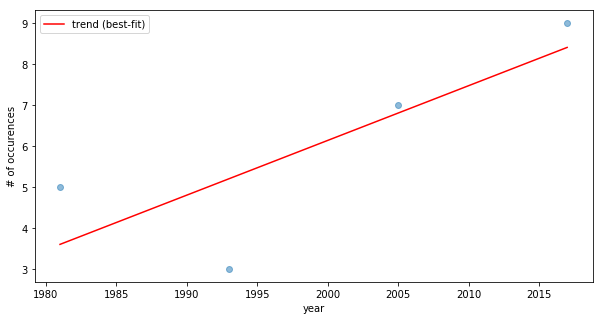

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(df['YEAR'], df['COUNT'], alpha=0.5, label='')
plt.plot(df['YEAR'], np.poly1d(np.polyfit(df['YEAR'], df['COUNT'], 1))(df['YEAR']), color='red', label='trend (best-fit)')

# N = len(df['YEAR'].tolist()) 
# fit least-squares with an intercept
# w = np.linalg.lstsq(np.hstack((df['YEAR'].tolist(), np.ones((N,1)))), df['COUNT'].tolist())[0]
# xx = np.linspace(*plt.gca().get_xlim()).T
# # plot best-fit line
# plt.plot(xx, w[0]*xx + w[1], '-k')

plt.legend()
plt.ylabel('# of occurences')
plt.xlabel('year')
# plt.savefig('test.png', facecolor='white', edgecolor='none')
plt.show()

In [31]:
import pandas as pd
import seaborn as sns
data_reduced= pd.read_csv('/home/neeraj/ascii-dataset-cleaning/data/copied_dir/yearly_counts.csv')
sns.regplot(data_reduced['YEAR'],data_reduced['COUNT'])

KeyError: 'YEAR'

In [27]:
year_count_df = pd.read_csv('/home/neeraj/ascii-dataset-cleaning/data/copied_dir/year_counts.csv', names=["YEAR", "COUNT"])
year_count_df.sort_values(by="YEAR")
# year_count_df.to_csv(YEARLY_COUNTS_FILE_PATH, index=False, header=False)

YEAR  COUNT
2  1973      0
4  1974      0
5  1976      0
0  1982      0
3  1983      0
1  1984      0

In [22]:
filter = df["TEMP_DIFF"] == "VERIFY!"
df[filter].count()['TEMP']

0

In [16]:
df.loc[0]["TEMP"].split(' ')[-1]

'1973'

In [49]:
incomplete_data = df['TEMP'].isnull()
separator_row = df['PRES'] > 1500
df.drop(df.index[incomplete_data & ~separator_row], inplace=True)
df

PRES             HGHT  TEMP
0     42182.0  00Z 02 Jan 1973   NaN
2       985.0              216   6.0
3       974.0              314  11.4
4       932.0              700  12.4
5       878.0             1223  11.4
6       855.0             1455  13.0
7       850.0             1507  12.6
8       700.0             3108   3.4
9       686.0             3272   2.6
10      652.0             3681   0.0
11      500.0             5750 -15.1
12      400.0             7400 -26.9
13      300.0             9430 -33.3
14      250.0            10690 -41.3
15      206.0            11974 -51.0
16      200.0            12170 -52.5
17      150.0            13970 -66.5
18      107.0            15918 -75.5
19      100.0            16350 -23.5
20    42182.0  12Z 02 Jan 1973   NaN
22      984.0              216  16.0
23      850.0             1506  14.2
24      700.0             3115   5.0
25      500.0             5770 -13.3
26      400.0             7430 -25.7
27      300.0             9460 -31.3
28      297.0             9532 -31.9
29      250.0            10760 -41.5
30      200.0            12210 -52.1
31      150.0            14010 -66.1
...       ...              ...   ...
2160    700.0             3089  14.2
2161    600.0             4379   8.4
2162    554.0             5033   4.4
2163    512.0             5670   0.0
2164    500.0             5860  -1.1
2165    496.0             5922  -1.1
2166    400.0             7610  11.2
2167    393.0             7751 -11.9
2168    369.0             8231 -15.3
2169    346.0             8716 -16.5
2170    300.0             9770 -25.1
2171    250.0            11060 -33.5
2172    200.0            12582 -47.2
2173    143.0            14660 -75.9
2174    105.0            16441 -76.3
2175  42182.0  12Z 31 Aug 1973   NaN
2177    968.0              216  29.4
2178    961.2              281  28.9
2179    927.8              609  26.3
2180    897.7              914  23.8
2181    850.0             1420  19.8
2182    782.0             2133  17.8
2183    700.0             3080  15.2
2184    500.0             5870   1.0
2185    485.9             6096  -0.3
2186    400.0             7630  -9.1
2187    300.0             9800  15.2
2188    200.0            12640 -45.3
2189    150.0            14490 -60.5
2190    100.0            16900 -77.1

[2092 rows x 3 columns]

In [50]:
df.reset_index(drop=True, inplace=True)
df

PRES             HGHT  TEMP
0     42182.0  00Z 02 Jan 1973   NaN
1       985.0              216   6.0
2       974.0              314  11.4
3       932.0              700  12.4
4       878.0             1223  11.4
5       855.0             1455  13.0
6       850.0             1507  12.6
7       700.0             3108   3.4
8       686.0             3272   2.6
9       652.0             3681   0.0
10      500.0             5750 -15.1
11      400.0             7400 -26.9
12      300.0             9430 -33.3
13      250.0            10690 -41.3
14      206.0            11974 -51.0
15      200.0            12170 -52.5
16      150.0            13970 -66.5
17      107.0            15918 -75.5
18      100.0            16350 -23.5
19    42182.0  12Z 02 Jan 1973   NaN
20      984.0              216  16.0
21      850.0             1506  14.2
22      700.0             3115   5.0
23      500.0             5770 -13.3
24      400.0             7430 -25.7
25      300.0             9460 -31.3
26      297.0             9532 -31.9
27      250.0            10760 -41.5
28      200.0            12210 -52.1
29      150.0            14010 -66.1
...       ...              ...   ...
2062    700.0             3089  14.2
2063    600.0             4379   8.4
2064    554.0             5033   4.4
2065    512.0             5670   0.0
2066    500.0             5860  -1.1
2067    496.0             5922  -1.1
2068    400.0             7610  11.2
2069    393.0             7751 -11.9
2070    369.0             8231 -15.3
2071    346.0             8716 -16.5
2072    300.0             9770 -25.1
2073    250.0            11060 -33.5
2074    200.0            12582 -47.2
2075    143.0            14660 -75.9
2076    105.0            16441 -76.3
2077  42182.0  12Z 31 Aug 1973   NaN
2078    968.0              216  29.4
2079    961.2              281  28.9
2080    927.8              609  26.3
2081    897.7              914  23.8
2082    850.0             1420  19.8
2083    782.0             2133  17.8
2084    700.0             3080  15.2
2085    500.0             5870   1.0
2086    485.9             6096  -0.3
2087    400.0             7630  -9.1
2088    300.0             9800  15.2
2089    200.0            12640 -45.3
2090    150.0            14490 -60.5
2091    100.0            16900 -77.1

[2092 rows x 3 columns]

In [84]:
df = pd.ExcelFile("../data/original/Gayatry_Balloon_Data/Temperature2-15 AugBalloonAug2016.xls").parse('Sheet1')

In [85]:
df.columns[::3]

Index([2018-08-02 00:00:00, 2018-08-03 00:00:00, 2018-08-05 00:00:00,
       2018-08-06 00:00:00, 2018-08-08 00:00:00, 2018-08-11 00:00:00,
       2016-08-11 00:00:00, 2018-08-12 00:00:00, 2016-08-12 00:00:00,
       2018-08-15 00:00:00],
      dtype='object')

In [82]:
for i in range(0,8):
    day_df = df.iloc[:, (3*i) : (3*i) + 3]

In [83]:
day_df.columns

Index([2018-08-12 00:00:00, u'2018-08-12 00:00:00.1',
       u'2018-08-12 00:00:00.2'],
      dtype='object')

In [68]:
columns_list = day_df.columns.tolist()

In [75]:
columns_list[1]

'2018-08-15 00:00:00.1'

In [55]:
		day_df.columns.values[0] = "pressure"
		day_df.columns.values[1] = "temperature"
		day_df.columns.values[2] = "height"

In [56]:
day_df

pressure  temperature    height
0     816.706100    23.398900  1.796245
1     816.205261    22.348900  1.801097
2     815.515000    20.836725  1.808528
3     814.849800    19.506067  1.816496
4     814.215100    18.943400  1.823664
5     813.553200    18.729456  1.829818
6     812.876700    18.540979  1.837501
7     812.097400    18.418634  1.845211
8     811.312100    18.360000  1.853236
9     810.579163    18.323267  1.860564
10    810.009300    18.284600  1.868624
11    809.499200    18.238458  1.873632
12    808.976600    18.175470  1.879841
13    808.420100    18.084619  1.885738
14    807.875900    17.999800  1.891172
15    807.313400    17.991876  1.898385
16    806.792969    18.047100  1.903290
17    806.368200    18.088068  1.906494
18    805.908500    18.098840  1.911608
19    805.351000    18.069025  1.917803
20    804.752700    17.965662  1.923717
21    804.196100    17.772200  1.928096
22    803.712200    17.612900  1.934299
23    803.214539    17.552576  1.939448
24    802.717468    17.532100  1.944794
25    802.210000    17.504633  1.950735
26    801.691400    17.481800  1.956690
27    801.182068    17.474300  1.962053
28    800.696838    17.464200  1.966823
29    800.232056    17.450800  1.972158
...          ...          ...       ...
5578         NaN          NaN       NaN
5579         NaN          NaN       NaN
5580         NaN          NaN       NaN
5581         NaN          NaN       NaN
5582         NaN          NaN       NaN
5583         NaN          NaN       NaN
5584         NaN          NaN       NaN
5585         NaN          NaN       NaN
5586         NaN          NaN       NaN
5587         NaN          NaN       NaN
5588         NaN          NaN       NaN
5589         NaN          NaN       NaN
5590         NaN          NaN       NaN
5591         NaN          NaN       NaN
5592         NaN          NaN       NaN
5593         NaN          NaN       NaN
5594         NaN          NaN       NaN
5595         NaN          NaN       NaN
5596         NaN          NaN       NaN
5597         NaN          NaN       NaN
5598         NaN          NaN       NaN
5599         NaN          NaN       NaN
5600         NaN          NaN       NaN
5601         NaN          NaN       NaN
5602         NaN          NaN       NaN
5603         NaN          NaN       NaN
5604         NaN          NaN       NaN
5605         NaN          NaN       NaN
5606         NaN          NaN       NaN
5607         NaN          NaN       NaN

[5608 rows x 3 columns]

In [179]:
heights = np.arange(5000, 27000, 1000)
avg_df_rows_list = []

for subset in dfs:
    
    # reset indices to find separator at index 0 always     
    subset.reset_index(drop=True, inplace=True)
    
    # handle the separator row separately ;)
    sep_row = {}
    sep_row["HGHT"] = subset.loc[0]['PRES']
    sep_row["AVG_TEMP"] = subset.loc[0]['HGHT']
    avg_df_rows_list.append(sep_row)
    
    # remove the first row from subset, set dataframe as float32 again
    subset.drop(subset.index[0], inplace=True)
    subset = subset.astype(np.float64)
    
    max_hgt_in_subset = float(np.array(subset['HGHT'], dtype=np.float64).max())
    
    # handle the data, interpolate if height range contains no data(avg_temp is NaN)
    hgt_list = []
    avg_temp_list = []

    for index, hgt in enumerate(heights[:-1]):
        if max_hgt_in_subset > hgt:
            height_range = subset['HGHT'].between(hgt, heights[index+1], inclusive=False)
            hgt_list.append(hgt)
            avg_temp_list.append(subset[height_range]['TEMP'].mean())
    
    # interpolate if necessary, restrain decimal digits
    avg_temp_list = pd.Series(avg_temp_list).interpolate(method='linear').tolist()
    avg_temp_list = [format(x, '.2f') for x in avg_temp_list]
    
    # convert to key-value form for adding to df
    for index, hgt in enumerate(hgt_list):
        data_row = {}
        data_row["HGHT"] = hgt
        data_row["AVG_TEMP"] = avg_temp_list[index]
        avg_df_rows_list.append(data_row)
            
avg_df = pd.DataFrame(avg_df_rows_list, columns=["HGHT","AVG_TEMP"]) 
avg_df.reset_index(drop=True, inplace=True)
avg_df

HGHT         AVG_TEMP
0     42182.0  00Z 02 Jan 1973
1      5000.0           -15.10
2      6000.0           -21.00
3      7000.0           -26.90
4      8000.0           -30.10
5      9000.0           -33.30
6     10000.0           -41.30
7     11000.0           -51.00
8     12000.0           -52.50
9     13000.0           -66.50
10    14000.0           -71.00
11    15000.0           -75.50
12    16000.0           -23.50
13    42182.0  12Z 02 Jan 1973
14     5000.0           -13.30
15     6000.0           -19.50
16     7000.0           -25.70
17     8000.0           -28.65
18     9000.0           -31.60
19    10000.0           -41.50
20    11000.0           -46.80
21    12000.0           -52.10
22    13000.0           -59.10
23    14000.0           -66.10
24    42182.0  12Z 03 Jan 1973
25     5000.0           -14.90
26     6000.0           -17.90
27     7000.0           -28.50
28     8000.0           -31.70
29     9000.0           -34.90
...       ...              ...
1335  10000.0           -29.10
1336  11000.0           -35.50
1337  12000.0           -47.90
1338  13000.0           -52.50
1339  42182.0  00Z 31 Aug 1973
1340   5000.0             0.55
1341   6000.0             0.10
1342   7000.0            -0.35
1343   8000.0           -15.90
1344   9000.0           -25.10
1345  10000.0           -29.30
1346  11000.0           -33.50
1347  12000.0           -47.20
1348  13000.0           -61.55
1349  14000.0           -75.90
1350  15000.0           -76.10
1351  16000.0           -76.30
1352  42182.0  12Z 31 Aug 1973
1353   5000.0             1.00
1354   6000.0            -0.30
1355   7000.0            -9.10
1356   8000.0             3.05
1357   9000.0            15.20
1358  10000.0            -4.97
1359  11000.0           -25.13
1360  12000.0           -45.30
1361  13000.0           -52.90
1362  14000.0           -60.50
1363  15000.0           -68.80
1364  16000.0           -77.10

[1365 rows x 2 columns]

In [189]:
# test for NaN values, should return 0
no_value_available = avg_df['AVG_TEMP'].isnull()
print avg_df[no_value_available].empty

True


In [182]:
# write df to file. phew!
avg_df.to_csv('test.csv', index=False, header=False)

In [7]:
FILE_PATH = "../data/copied_dir/COMPILE.xlsx"
cols=[2,
 4,
 15,
 18,
 20,
 31,
 44,
 46,
 57,
 70,
 72,
 83,
 96,
 98,
 109,
 122,
 124,
 135,
 148,
 150,
 161,
 174,
 176,
 187,
 200,
 202,
 213,
 226,
 228,
 239]

# skip first row while reading
df = pd.ExcelFile(FILE_PATH).parse(sheet_name='Sheet1', usecols=cols)


In [12]:
# find indices for empty columns
indices_for_split = []
for index, i in enumerate(df.columns):
#     print i
	if i.find("Unnamed") == 0:
		indices_for_split.append(index)

In [13]:
indices_for_split

[2, 5, 8, 11, 14, 17, 20, 23, 26, 29]

In [21]:
dfs = np.split(df, indices_for_split, axis=1)

In [34]:
dfs[9]

Unnamed: 213  O3RAW_PartialPressure [mPa].9  Ozone mixing Ratio
0               NaN                       2.013753            0.002392
1               NaN                       2.013753            0.002391
2               NaN                       2.013753            0.002392
3               NaN                       2.013753            0.002394
4               NaN                       2.013753            0.002395
5               NaN                       1.884111            0.002243
6               NaN                       1.779460            0.002119
7               NaN                       1.686914            0.002010
8               NaN                       1.539699            0.001835
9               NaN                       1.467459            0.001750
10              NaN                       1.404590            0.001676
11              NaN                       1.345626            0.001607
12              NaN                       1.294082            0.001546
13              NaN                       1.246832            0.001491
14              NaN                       1.199583            0.001435
15              NaN                       1.158582            0.001387
16              NaN                       1.120704            0.001342
17              NaN                       1.056664            0.001266
18              NaN                       1.024253            0.001228
19              NaN                       0.994186            0.001193
20              NaN                            NaN                 NaN
21              NaN                       0.964899            0.001159
22              NaN                       0.938346            0.001128
23              NaN                       0.887973            0.001068
24              NaN                       0.865715            0.001041
25              NaN                       0.844628            0.001017
26              NaN                       0.808313            0.000973
27              NaN                       0.789179            0.000951
28              NaN                       0.771607            0.000930
29              NaN                       0.754425            0.000910
...             ...                            ...                 ...
10428           NaN                            NaN                 NaN
10429           NaN                            NaN                 NaN
10430           NaN                            NaN                 NaN
10431           NaN                            NaN                 NaN
10432           NaN                            NaN                 NaN
10433           NaN                            NaN                 NaN
10434           NaN                            NaN                 NaN
10435           NaN                            NaN                 NaN
10436           NaN                            NaN                 NaN
10437           NaN                            NaN                 NaN
10438           NaN                            NaN                 NaN
10439           NaN                            NaN                 NaN
10440           NaN                            NaN                 NaN
10441           NaN                            NaN                 NaN
10442           NaN                            NaN                 NaN
10443           NaN                            NaN                 NaN
10444           NaN                            NaN                 NaN
10445           NaN                            NaN                 NaN
10446           NaN                            NaN                 NaN
10447           NaN                            NaN                 NaN
10448           NaN                            NaN                 NaN
10449           NaN                            NaN                 NaN
10450           NaN                            NaN                 NaN
10451           NaN                            NaN                 NaN
10452           NaN            